In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

/home/saurabh/ML_Environment/Linux_Environment/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score, accuracy_score

In [3]:
TRAIN_PATH = 'D:\\PythonEnvironment\\AirlinesHackathon\\input\\train.csv'

In [4]:
df = pd.read_csv(TRAIN_PATH)

In [5]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [6]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 898.5+ KB


In [16]:
target_count = df['Severity'].value_counts()

In [17]:
target_count*100/target_count.sum()

Highly_Fatal_And_Damaging                  30.49
Significant_Damage_And_Serious_Injuries    27.29
Minor_Damage_And_Injuries                  25.27
Significant_Damage_And_Fatalities          16.95
Name: Severity, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

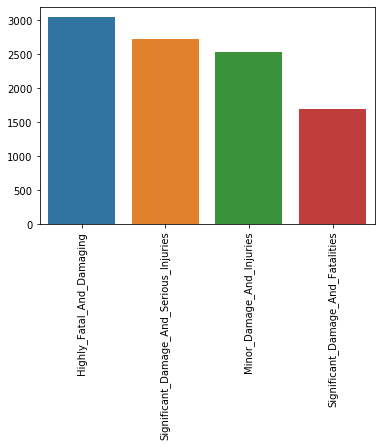

In [23]:
sns.barplot(x=target_count.index, y=target_count.values)
plt.xticks(rotation=90)

In [26]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [92]:
X = df.iloc[ : , 1 : ].copy()
y = df.iloc[ : , : 1].copy()


In [93]:
X.head()
X.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [34]:
y.head()

,Severity
0,Minor_Damage_And_Injuries
1,Minor_Damage_And_Injuries
2,Significant_Damage_And_Fatalities
3,Significant_Damage_And_Serious_Injuries
4,Significant_Damage_And_Fatalities


In [39]:
features = X.columns

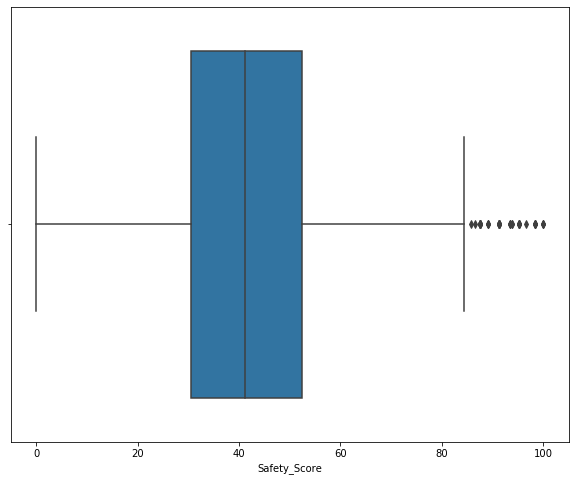

In [57]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Safety_Score', data=df)

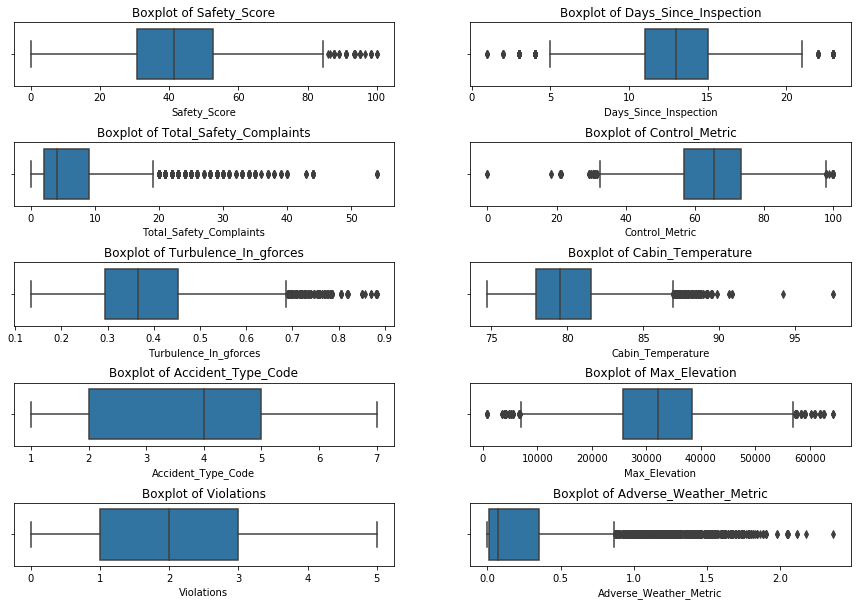

In [62]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (15, 10))
plt.subplots_adjust(hspace=0.9)
for i,j in np.ndindex(axes.shape):
    sns.boxplot(x = X[features[2*i + j]], ax=axes[i, j])
    axes[i, j].set(title='Boxplot of {}'.format(features[2*i + j]))
plt.show()

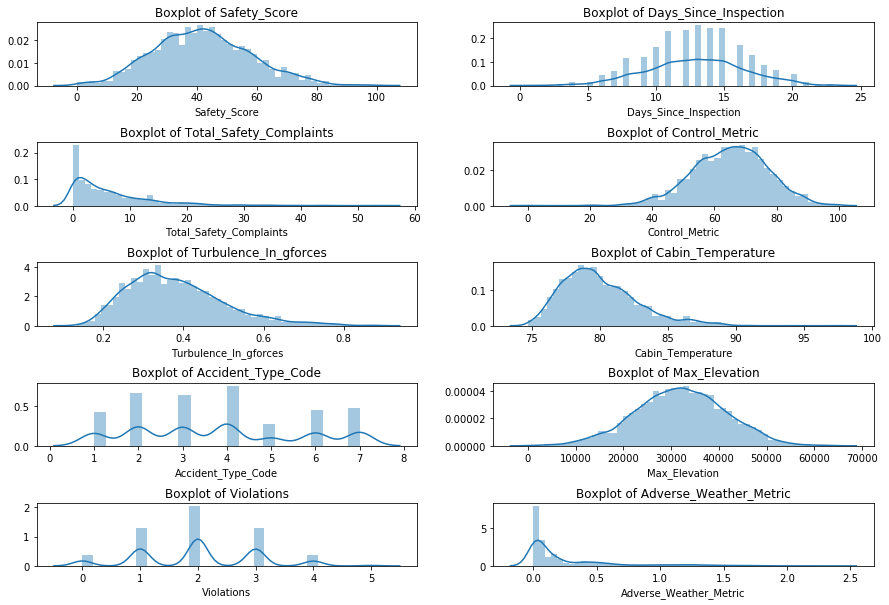

In [64]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (15, 10))
plt.subplots_adjust(hspace=0.9)
for i,j in np.ndindex(axes.shape):
    sns.distplot(X[features[2*i + j]], ax=axes[i, j])
    axes[i, j].set(title='Boxplot of {}'.format(features[2*i + j]))
plt.show()

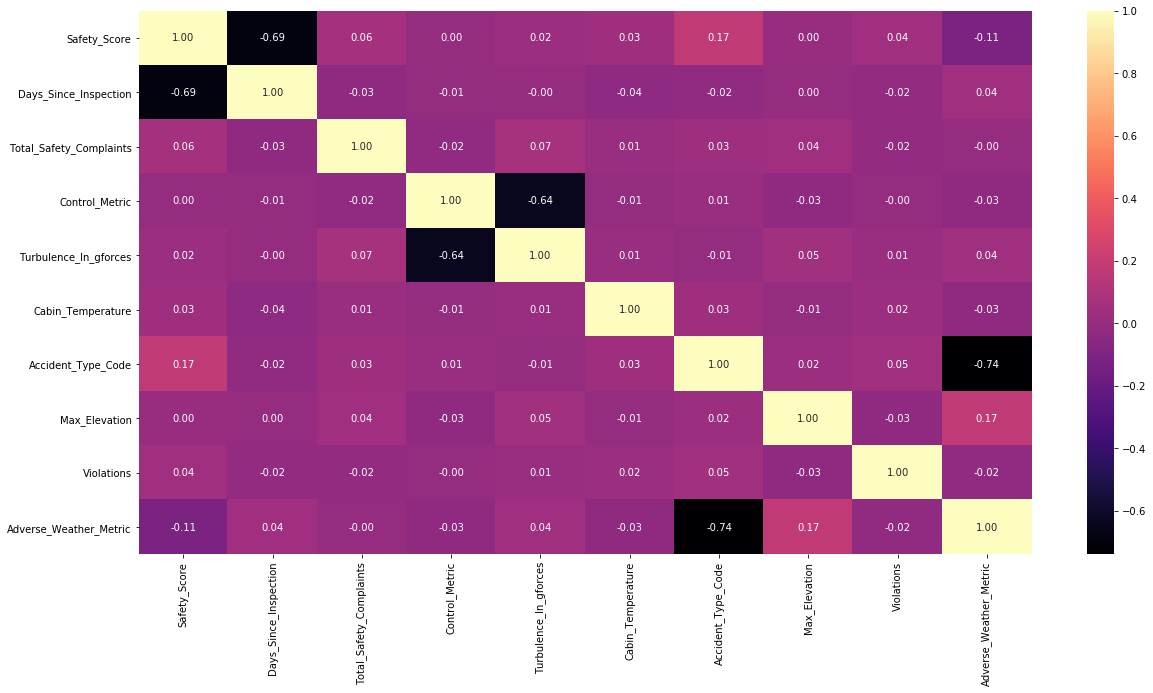

In [94]:
X.drop(columns='Accident_ID', inplace=True)
plt.figure(figsize=(20, 10))
sns.heatmap(X.corr(), cmap='magma', annot=True, fmt='.2f')


In [95]:
X.skew()

Safety_Score               0.236302
Days_Since_Inspection     -0.073910
Total_Safety_Complaints    1.888080
Control_Metric            -0.201482
Turbulence_In_gforces      0.816746
Cabin_Temperature          0.854437
Accident_Type_Code         0.252367
Max_Elevation             -0.038195
Violations                 0.096772
Adverse_Weather_Metric     2.074086
dtype: float64

In [96]:
X['Total_Safety_Complaints'] = np.sqrt(X['Total_Safety_Complaints'])
X['Adverse_Weather_Metric'] = np.sqrt(X['Adverse_Weather_Metric'])

In [97]:
X.skew()

Safety_Score               0.236302
Days_Since_Inspection     -0.073910
Total_Safety_Complaints    0.333575
Control_Metric            -0.201482
Turbulence_In_gforces      0.816746
Cabin_Temperature          0.854437
Accident_Type_Code         0.252367
Max_Elevation             -0.038195
Violations                 0.096772
Adverse_Weather_Metric     1.061850
dtype: float64

In [99]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.values)

D:\PythonEnvironment\ML_Environment\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
y

array([1, 1, 2, ..., 3, 1, 0])

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [105]:
from collections import Counter

In [106]:
Counter(y_train)

Counter({3: 2183, 2: 1356, 1: 2022, 0: 2439})

In [107]:
Counter(y_test)

Counter({1: 505, 3: 546, 0: 610, 2: 339})

In [108]:
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=4, verbose=2)

In [109]:
clf_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [110]:
y_pred = clf_rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [112]:
clf_rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


0.6735

In [113]:
f1_score(y_test, y_pred, average='weighted')

0.6738993141314619

In [114]:
clf_rf.feature_importances_

array([0.32681513, 0.09777411, 0.0013849 , 0.18313273, 0.03054053,
       0.00369975, 0.20245374, 0.00441516, 0.00106736, 0.14871658])